# Hard Margin SVM

In sklearn implementation we just put high C value to get hard margin SVM



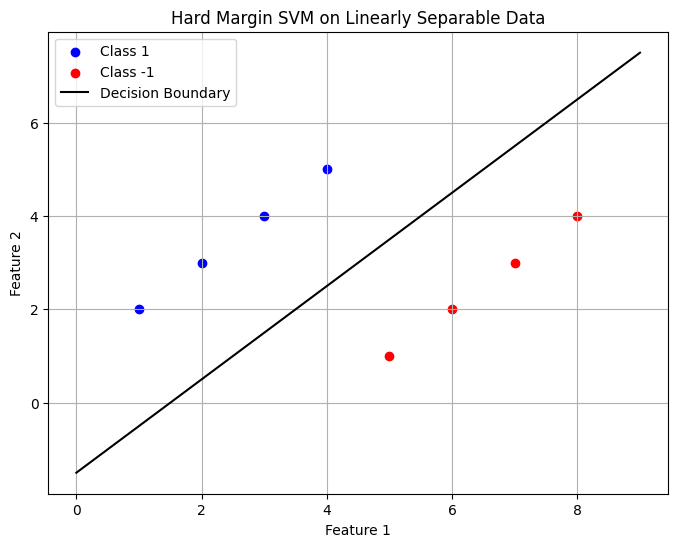

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate linearly separable data
X_class1 = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
X_class2 = np.array([[5, 1], [6, 2], [7, 3], [8, 4]])
X = np.vstack((X_class1, X_class2))
y = np.array([1]*len(X_class1) + [-1]*len(X_class2))

# Create a linear SVM with a very large C to approximate a hard margin
model = svm.SVC(kernel='linear', C=1e10)
model.fit(X, y)

# Get the separating hyperplane
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 9, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Plot the data points, separating hyperplane, and support vectors
plt.figure(figsize=(8, 6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='Class -1')
plt.plot(x_plot, y_plot, 'k-', label='Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Hard Margin SVM on Linearly Separable Data')
plt.legend()
plt.grid(True)
plt.show()

# What happens when we pass non-linear data to hard margin SVM?

## Visualising the data

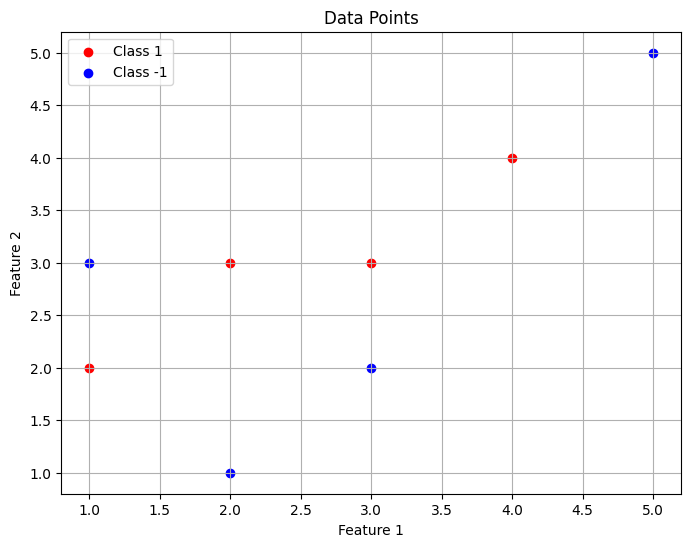

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2], [1, 3], [4, 4], [5, 5]])
y = np.array([1, 1, 1, -1, -1, -1, 1, -1])

# Plot the data points with different colors for different classes
plt.figure(figsize=(8, 6))
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Points')
plt.legend()
plt.grid(True)
plt.show()

## Warning: The below cell will run take forever to fit and crash your runtime as hard margin SVM cant fit on non-linear data

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn import svm
# import signal

# # Example data
# X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2], [1, 3], [4, 4], [5, 5]])
# y = np.array([1, 1, 1, -1, -1, -1, 1, -1])

# model = svm.SVC(kernel='linear', C=1e10)
# model.fit(X, y)

# Soft Margin SVM

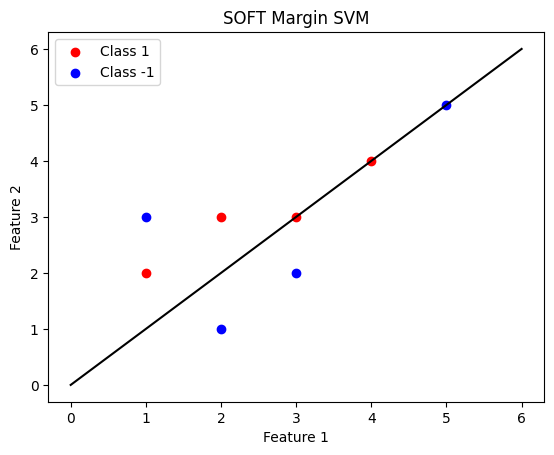

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Example data
X = np.array([[1, 2], [2, 3], [3, 3], [2, 1], [3, 2], [1, 3], [4, 4], [5, 5]])
y = np.array([1, 1, 1, -1, -1, -1, 1, -1])

# Create a linear SVM with a very large C to approximate a hard margin
model = svm.SVC(kernel='linear', C=10)
model.fit(X, y)

# Get the separating hyperplane
w = model.coef_[0]
b = model.intercept_[0]
x_plot = np.linspace(0, 6, 100)
y_plot = -(w[0] * x_plot + b) / w[1]

# Plot the data and the separating hyperplane
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='blue', label='Class -1')
plt.plot(x_plot, y_plot, 'k-')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SOFT Margin SVM')
plt.legend()
plt.show()

# Polynomial Kernel SVM

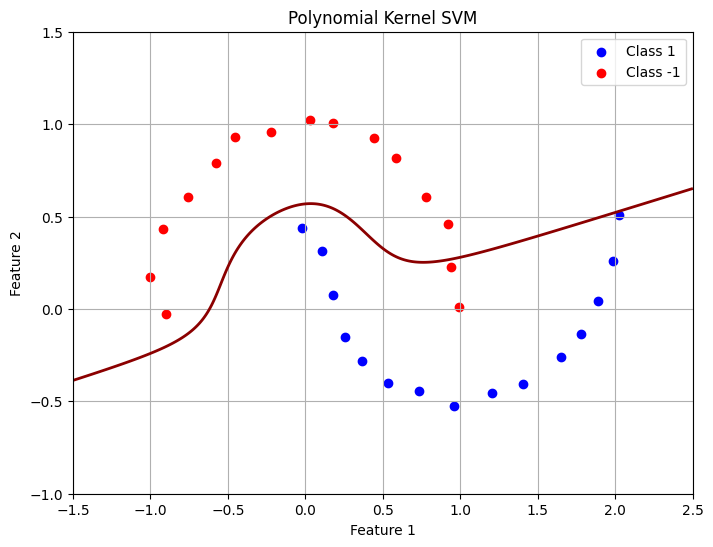

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_moons

# Generate non-linearly separable data (moons)
X, y = make_moons(n_samples=30, noise=0.03, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels from {0, 1} to {-1, 1}

# Create a polynomial kernel SVM
model = svm.SVC(kernel='poly', degree=5, C=1)
model.fit(X, y)

# Create a grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 2.5, 500), np.linspace(-1, 1.5, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points, decision boundary, and support vectors
plt.figure(figsize=(8, 6))
# plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial Kernel SVM')
plt.legend()
plt.grid(True)
plt.show()

# Radial Basis Kernel SVM

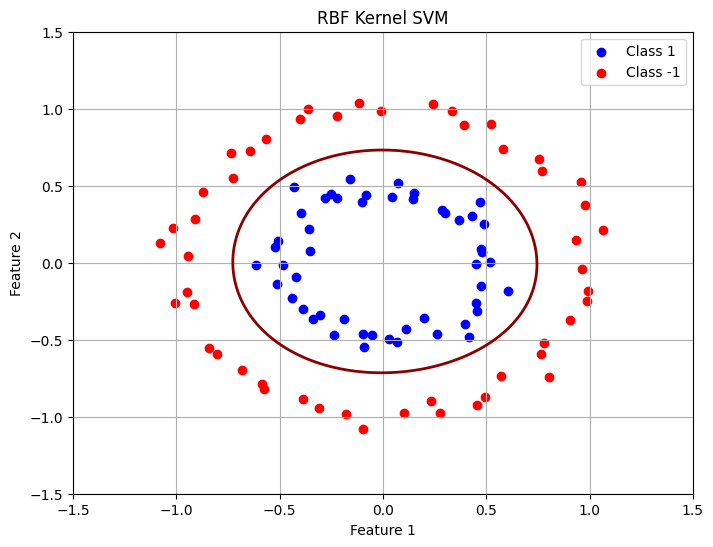

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_circles

# Generate non-linearly separable data (circles)
X, y = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels from {0, 1} to {-1, 1}

# Create an RBF kernel SVM
model = svm.SVC(kernel='rbf', C=1)
model.fit(X, y)

# Create a grid to plot decision boundary
xx, yy = np.meshgrid(np.linspace(-1.5, 1.5, 500), np.linspace(-1.5, 1.5, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the data points, decision boundary, and support vectors
plt.figure(figsize=(8, 6))
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='red', label='Class -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF Kernel SVM')
plt.legend()
plt.grid(True)
plt.show()